# Solving the Eigenvalue Problem using Forward Euler

In this notebook, we will solve a differential equation whose equilibrium points are the eigenvectors of a real, symmetric matrix. This notebook will be concerned with doing this using the forward euler method

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from trial_functions import generate_symmetric
from eigenvector_utils import is_linearly_dependent, compute_eigenvalue, is_eigenvector

sns.set()

In [4]:
def f(x, A):
    return ((x@x) * A + (1 - x@A@x) * np.eye(A.shape[0]))@x

def forward_euler(x0, A, h, T):
    n_steps = int(T / h)
    x = np.zeros((n_steps+1, A.shape[0]))
    t = np.linspace(0, T, n_steps+1)
    x[0] = x0
    for i in range(n_steps):
        x[i+1] = x[i] + h * (- x[i] + f(x[i], A))
    return t, x

In [5]:
N = 6
A = generate_symmetric(N)


In [4]:
print("NumPy eigenvalues:")
benchmark = np.linalg.eig(A)[0]
print(benchmark)

NumPy eigenvalues:
[-2.96774678 -1.82212821  1.52803295  0.04044609 -0.19324486 -0.11012639]


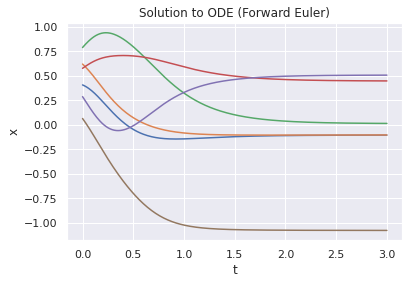

Is eigenvector:  True
Eigenvalue:  1.528026718941833
Difference from benchmark:  6.231070703188735e-06


In [5]:
x0 = np.random.rand(N)
h = 0.01
T = 3
t, x = forward_euler(x0, A, h, T)
plt.plot(t, x)
plt.title("Solution to ODE (Forward Euler)")
plt.xlabel("t")
plt.ylabel("x")
plt.savefig("Plots/eigenvalue_FE_A.pdf")
plt.show()

candidate = x[-1]
candidate = candidate / np.linalg.norm(candidate)
candidate_lambda = compute_eigenvalue(A, candidate)
print("Is eigenvector: ", is_eigenvector(A, candidate))
print("Eigenvalue: ", candidate_lambda)
print("Difference from benchmark: ", min(abs(candidate_lambda - benchmark_i) for benchmark_i in benchmark))

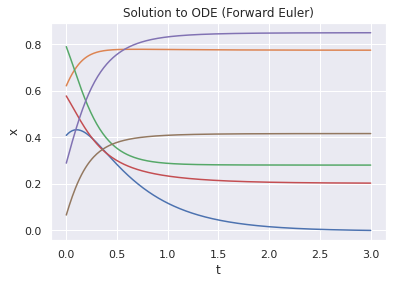

Is eigenvector:  True
Eigenvalue:  -2.9677403843528194
Difference from benchmark:  6.396944451037001e-06


In [6]:
# Repeat for -A
t, x = forward_euler(x0, -A, h, T)
plt.plot(t, x)
plt.title("Solution to ODE (Forward Euler)")
plt.xlabel("t")
plt.ylabel("x")
plt.savefig("Plots/eigenvalue_FE_-A.pdf")
plt.show()

candidate = x[-1]
candidate = candidate / np.linalg.norm(candidate)
candidate_lambda = compute_eigenvalue(A, candidate)
print("Is eigenvector: ", is_eigenvector(A, candidate))
print("Eigenvalue: ", candidate_lambda)
print("Difference from benchmark: ", min(abs(candidate_lambda - benchmark_i) for benchmark_i in benchmark))

In [7]:
N=6
A = generate_symmetric(N, seed=99)
benchmark = np.linalg.eig(A)[0]
h = 0.01
T = 3
n_samples = 1000

cnt = [0 for i in range(N)]
for i in range(n_samples):
    x0 = np.random.randn(N)
    t, x = forward_euler(x0, A, h, T)
    candidate = x[-1]
    candidate = candidate / np.linalg.norm(candidate)
    candidate_lambda = compute_eigenvalue(A, candidate)
    if is_eigenvector(A, candidate):
        cnt[np.argmin(abs(candidate_lambda - benchmark))] += 1


print(benchmark)
print(cnt)


[-2.00883503  2.29340536  1.71041697 -0.68576883  0.49485595 -0.03387657]
[0, 886, 0, 0, 0, 0]


In [8]:
N=6
A = -generate_symmetric(N)
benchmark = np.linalg.eig(A)[0]
h = 0.01
T = 3
n_samples = 1000

cnt = [0 for i in range(N)]
for i in range(n_samples):
    x0 = np.random.randn(N)
    t, x = forward_euler(x0, A, h, T)
    candidate = x[-1]
    candidate = candidate / np.linalg.norm(candidate)
    candidate_lambda = compute_eigenvalue(A, candidate)
    if is_eigenvector(A, candidate):
        cnt[np.argmin(abs(candidate_lambda - benchmark))] += 1


print(benchmark)
print(cnt)

[ 2.96774678  1.82212821 -1.52803295 -0.04044609  0.19324486  0.11012639]
[971, 0, 0, 0, 0, 0]


Next, we move onto the problem of seeing if we can compute all eigenvectors/eigenvalues.

In [8]:
# Compute an eigenvalue
N = 6
A = generate_symmetric(N)
benchmark = np.linalg.eig(A)[0]
x0 = np.random.rand(N)
h = 0.01
T = 3
print("Benchmark eigenvalues:")
print(benchmark)

Benchmark eigenvalues:
[-2.96774678 -1.82212821  1.52803295  0.04044609 -0.19324486 -0.11012639]


In [41]:
t, x = forward_euler(x0, A, h, T)
candidate = x[-1]
candidate = candidate / np.linalg.norm(candidate)
print("Is eigenvector: ", is_eigenvector(A, candidate))
print("Eigenvalue: ", compute_eigenvalue(A, candidate))


Is eigenvector:  True
Eigenvalue:  1.5279965193347886


In [111]:
n_simulations = 1000
found_eigenvalues = []
for i in range(n_simulations):
    # Compute new eigenvalue:
    x0 = np.random.rand(N)
    x0 = x0 - x0@candidate * candidate # Orthogonalize
    t, x = forward_euler(x0, A, h, T)
    candidate2 = x[-1]
    candidate2 = candidate2 / np.linalg.norm(candidate2)
    if is_eigenvector(A, candidate2):
        found_eigenvalues.append(compute_eigenvalue(A, candidate2))
print("n_found:", len(found_eigenvalues))
print("Equals eigenvalue 1:", len([i for i in found_eigenvalues if abs(i - benchmark[2]) < 1e-3]))

n_found: 289
Equals eigenvalue 1: 289


We see that the equation does not converge to non-maximal eigenvalues.